In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import waveoptics as wv
from waveoptics.devices.slm import SLMPistonSquare

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


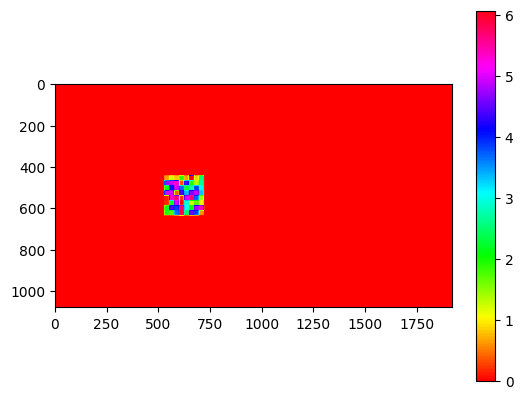

In [19]:
slm = SLMPistonSquare()
slm.generate_phases(8)

plt.imshow(slm.phase_matrix, cmap='hsv')
plt.colorbar()